In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
# Change VClass to ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses)

df['trans_type'] = df['trans'].apply(lambda x: x.split()[0]) # split the string on the space and take the first item

### Example 1A - `seaborn.FacetGrid` (one categorical & one quantitative variable)

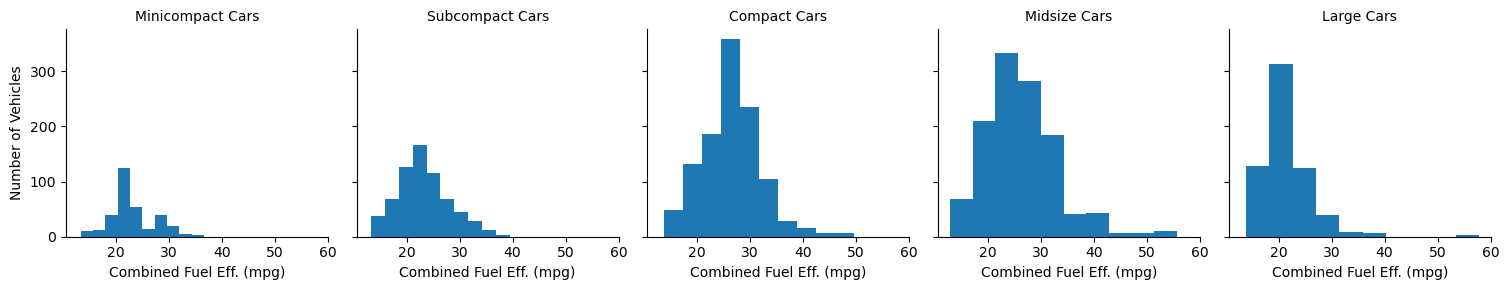

In [5]:
g = sns.FacetGrid(data = df, col = 'VClass')
g.map(plt.hist, 'comb')
g.set_titles('{col_name}')
g.set_xlabels('Combined Fuel Eff. (mpg)')
g.set_ylabels('Number of Vehicles');

### Example 1B - Faceting with three variables (two categorical & one quantitative)

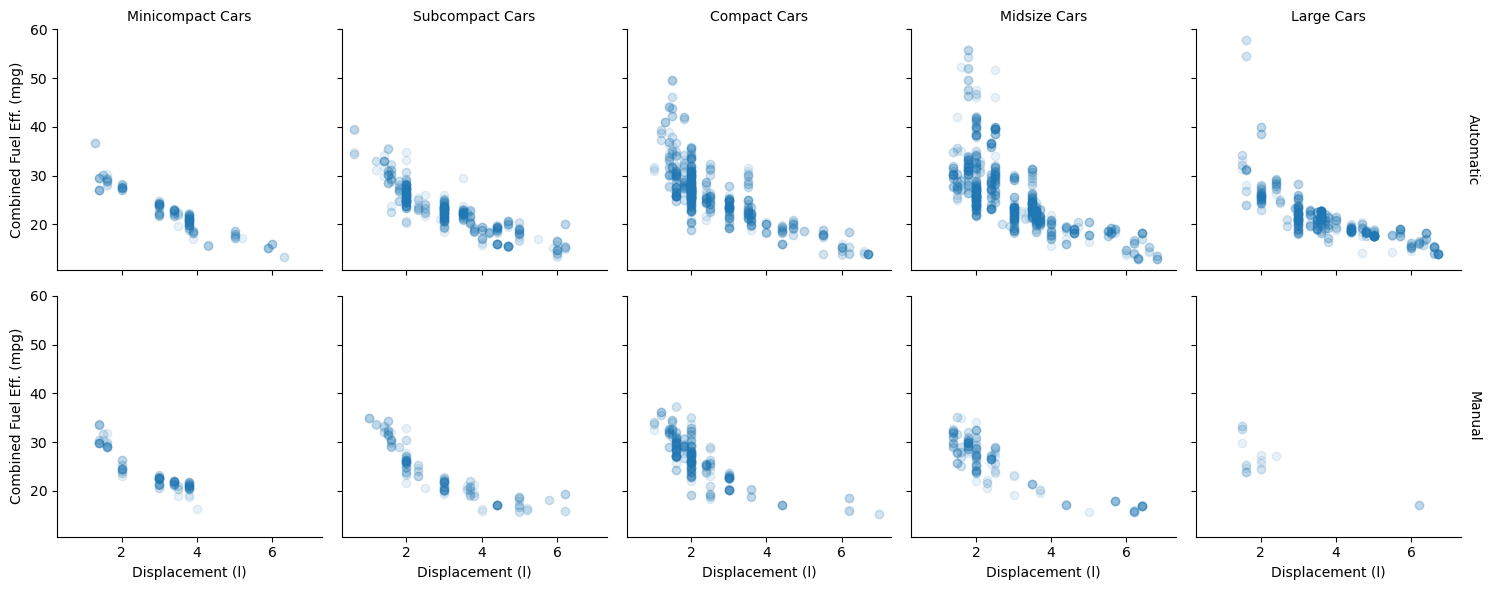

In [42]:
g = sns.FacetGrid(data = df, col = 'VClass', row='trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb', alpha=0.1)
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_xlabels('Displacement (l)')
g.set_ylabels('Combined Fuel Eff. (mpg)');

### Example 1C

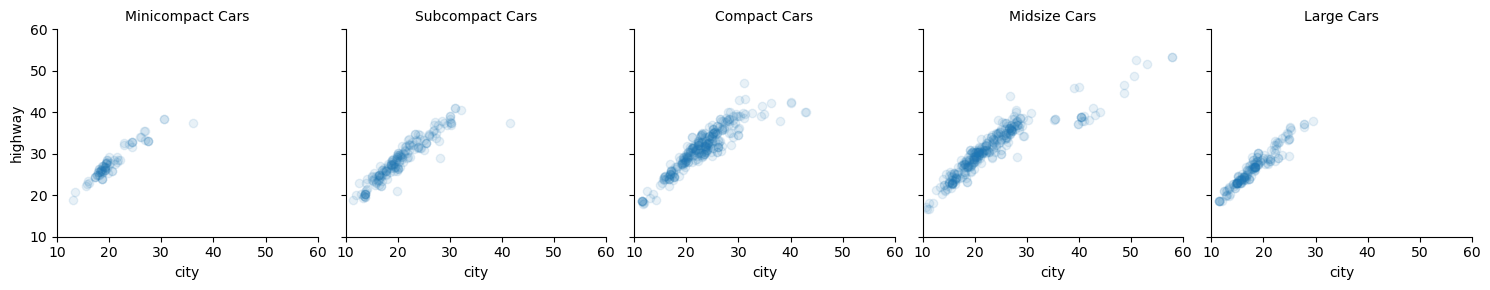

In [40]:
g = sns.FacetGrid(data=df.sample(frac=.25), col='VClass')
g.map(sns.regplot, 'city', 'highway', fit_reg=False, scatter_kws={'alpha': .1})
# x=np.array([1,2,3,4,5,6])*10
# g.map(sns.lineplot, data=pd.DataFrame({'x': x, 'y': x}), x='x', y='y', color='r', alpha=0.5)
g.set_titles('{col_name}')
g.set(ylim=(10, 60), xlim=(10, 60));

### Example 2 - Wrapping

In [8]:
df['comb'].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

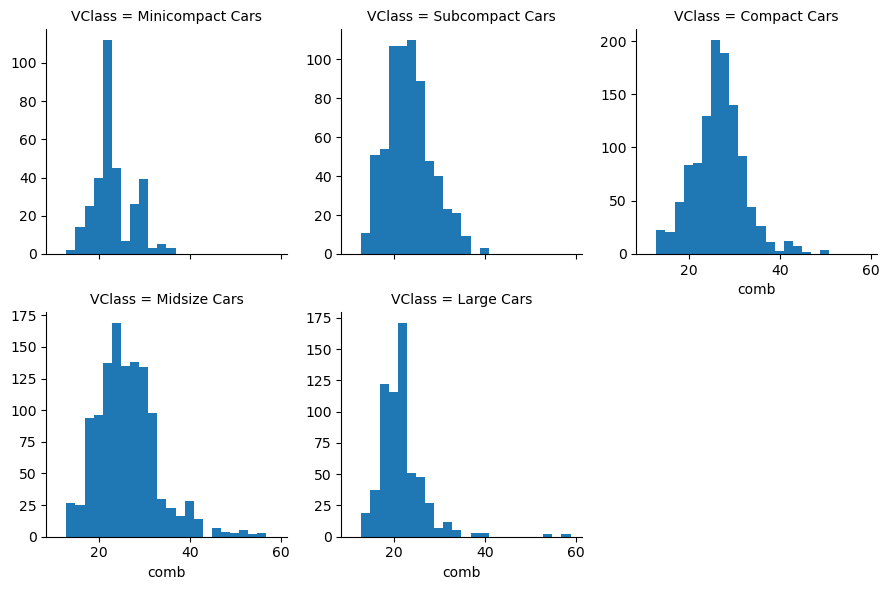

In [9]:
bin_edges = np.arange(df['comb'].min()-2, df['comb'].max()+2, 2)

g = sns.FacetGrid(data=df, col='VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins=bin_edges);

### Example 3

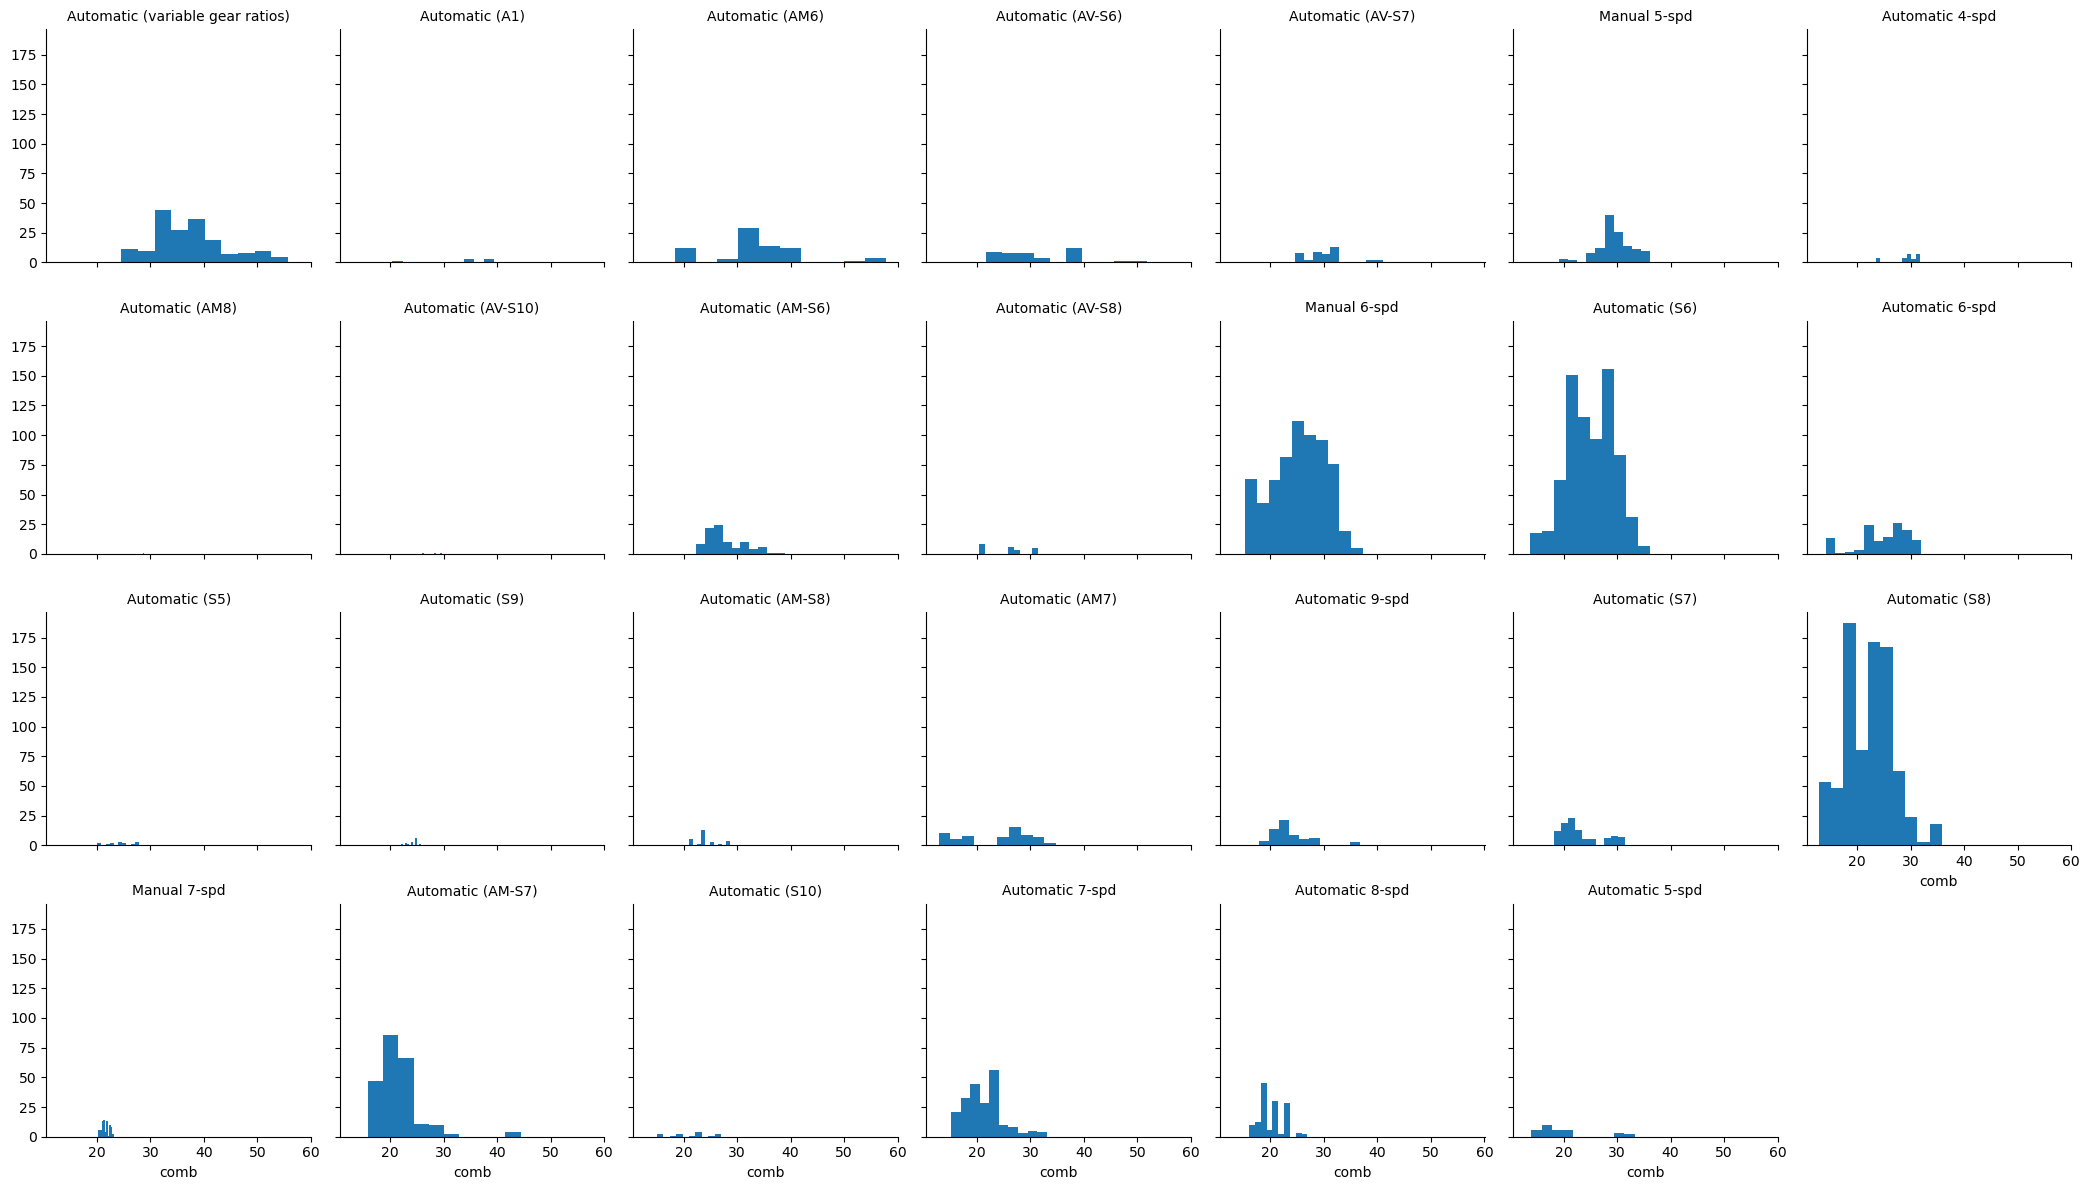

In [10]:
# For each transmission type, find the combined fuel efficiency
group_means = df[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission types in decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending=False).index

# Use the argument col_order to rearrange the columns in your figure
g = sns.FacetGrid(data = df, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')
g.set_titles('{col_name}');

### Example 4

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

In [11]:
# Get the list of manufacturers meeting the threshold
THRESHOLD = 80

make_freqs = df['make'].value_counts()
idx = np.sum(make_freqs >= THRESHOLD)
most_makes = make_freqs[:idx] # one line: make_freqs[make_freqs >= THRESHOLD]

df_sub = df.loc[df['make'].isin(most_makes.index)]

In [12]:
# Get the sorted order of combined fuel efficiency for the plots
comb_means = df_sub.groupby('make')['comb'].mean()
comb_means_order = comb_means.sort_values(ascending=False).index

In [13]:
# Plot the combined fuel efficiency histograms by manufacturer
bin_size = 2
bin_edges = np.arange(comb_means.min(), comb_means.max()+bin_size, bin_size)

##### Example 4a - Counts

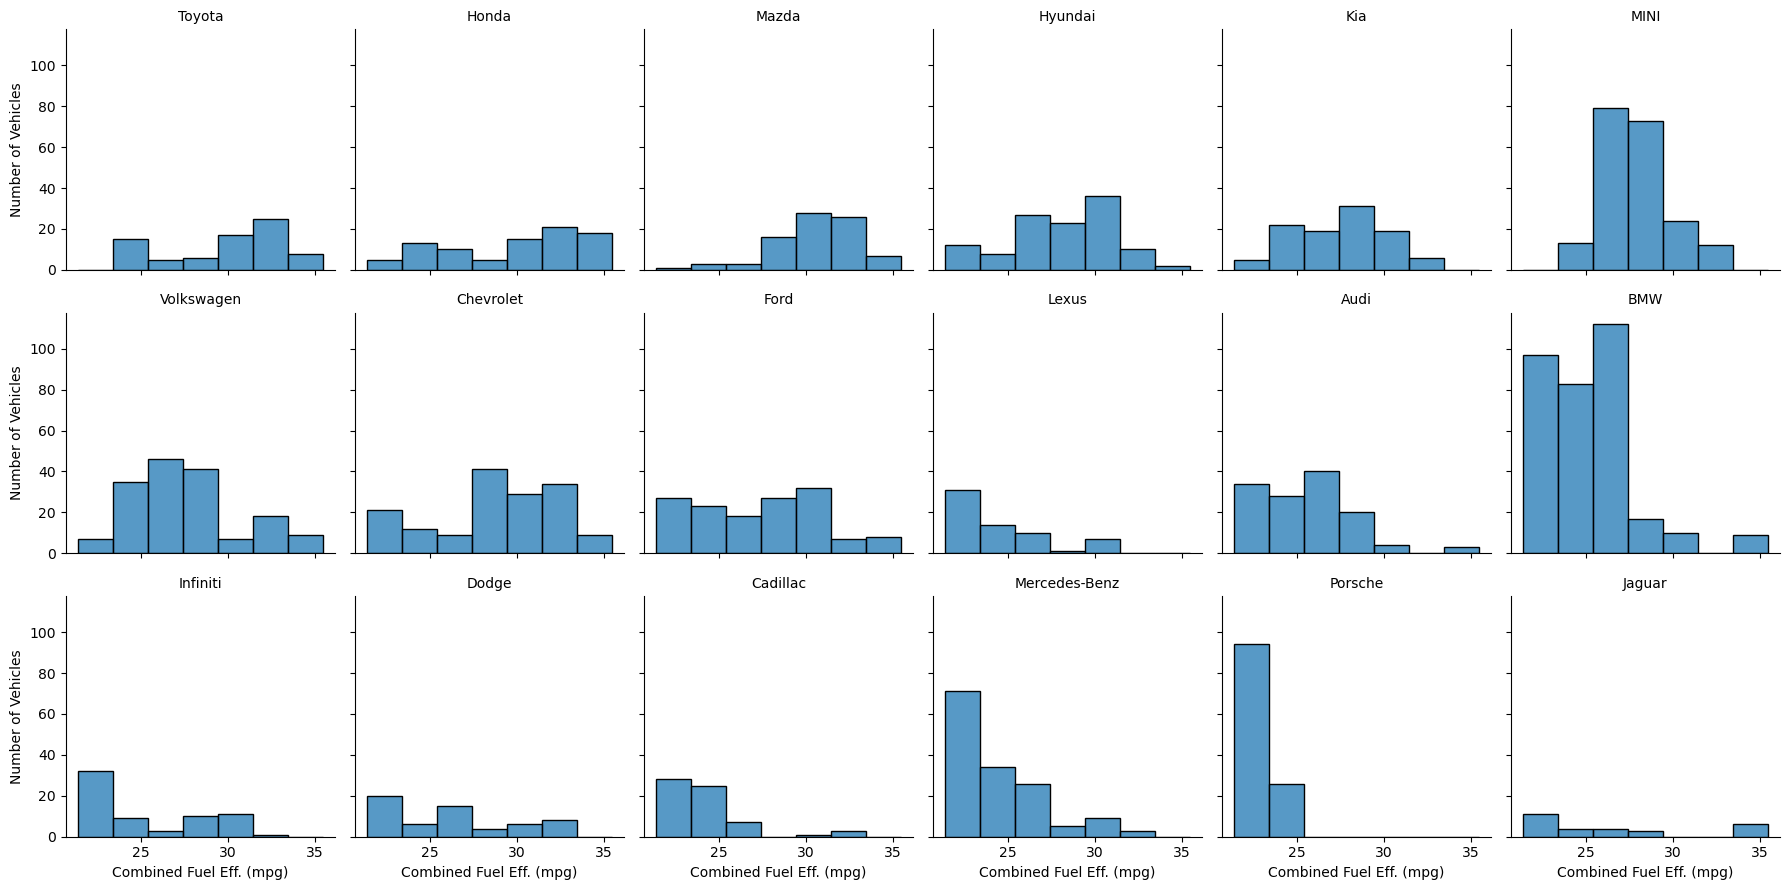

In [14]:
g = sns.FacetGrid(data=df, col='make', col_wrap=6, col_order=comb_means_order)
g.map(sns.histplot, 'comb', bins=bin_edges)
g.set_titles('{col_name}')
g.set_xlabels('Combined Fuel Eff. (mpg)')
g.set_ylabels('Number of Vehicles');

##### Example 4b - Proportions

Given the large number of BMWs that affect the scale of our plots, we can scale our values to be within $[0, 1]$ based on proportion of various fuel efficiencies.

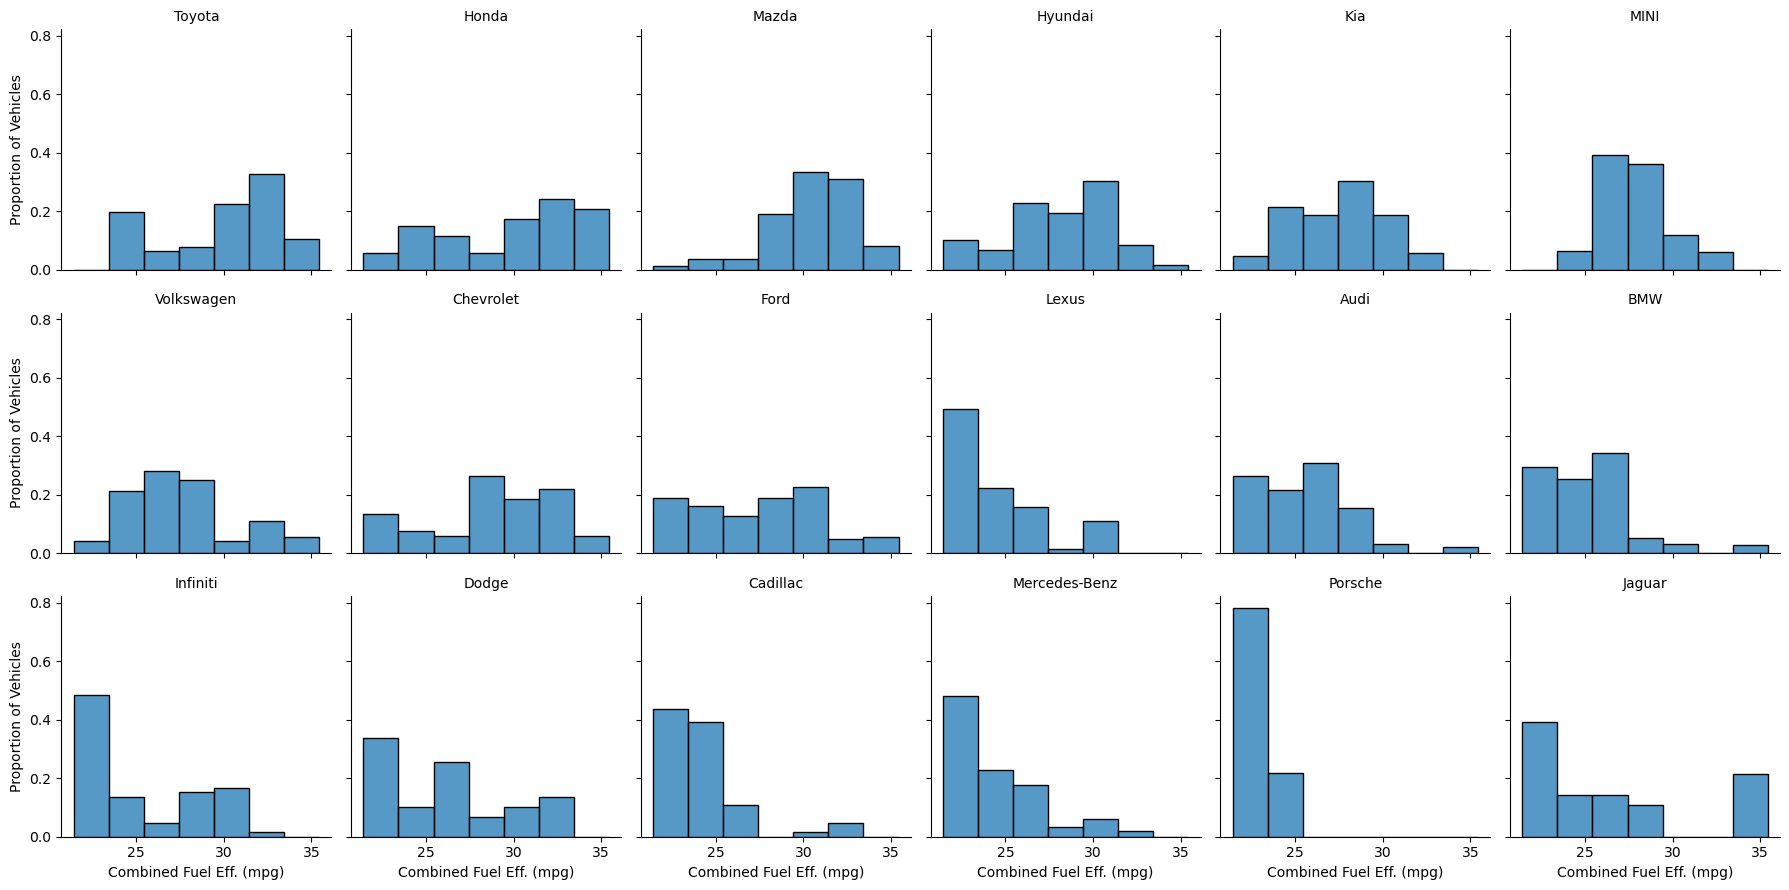

In [15]:
g = sns.FacetGrid(data=df, col='make', col_wrap=6, col_order=comb_means_order)
g.map(sns.histplot, 'comb', bins=bin_edges, stat='probability')
g.set_titles('{col_name}')
g.set_xlabels('Combined Fuel Eff. (mpg)')
g.set_ylabels('Proportion of Vehicles');